<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1">Цель проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2">Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.1">Вывод по разделу</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3">Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-3.1">Вывод по разделу</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4">Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5">Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-5.1">Вывод по разделу</a></span></li></ul></li><li><span><a href="#Вывод-по-проекту" data-toc-modified-id="Вывод-по-проекту-6">Вывод по проекту</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7">Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

## Цель проекта
Защитить данные клиентов страховой компании, а именно разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Необходимо добиться того, чтобы при преобразовании данных качество модели не ухудшилось.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('/content/insurance.csv')


In [3]:
# Делаем функцию для обзора данных
def data_overview(data):
    '''
    Функция для обзора данных,
    принимает на вход датафрейм,
    выводит на экран его основные характеристики
    и графики
    '''
    print('Первые пять строк', (80 - len('Первые пять строк')) * '-')
    display(data.head())   
    print('')
    print('Общая информация о данных (info)', (80 - len('Общая информация о данных (info)')) * '-', '\n')
    data.info()
    print('')
    print('Статистические показатели (describe)', (80 - len('Статистические показатели (describe)')) * '-')
    display(data.describe().T)
    print('')
    print ('Пропущенные значения в данных', (80 - len('Пропущенные значения в данных')) * '-')
    print('')
    empty = sum(data.isna().sum())
    if empty > 0:
        print(f'Количество пропусков в данных: {empty}')
    else:
        print('Пропущенных значений нет')
    print('')
    print('Дубликаты в данных', (80 - len('Дубликаты в данных')) * '-')
    print('')
    if data.duplicated().sum() > 0:
        print (f'Количество дубликатов в данных: {data.duplicated().sum()}')
    else:
        print('Дубликатов нет')
    

In [4]:
data_overview(df)

Первые пять строк ---------------------------------------------------------------


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Общая информация о данных (info) ------------------------------------------------ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Статистические показатели (describe) --------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0



Пропущенные значения в данных ---------------------------------------------------

Пропущенных значений нет

Дубликаты в данных --------------------------------------------------------------

Количество дубликатов в данных: 153


Количество наблюдений — 5000.

Пропусков в даннных нет.

Средний возраст клиентов — около 30 лет. Максимальный — 65, минимальный — 18. 

В наших данных есть дубликаты. Мы не можем утверждать, что это именно дублирующиеся наблюдения, а не совпадающие значения признаков, однако чтобы модель не переобучилась и не были смещены коэффициенты регрессии, дубликаты мы удалим.

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().any()

False

Дубликатов в данных не осталось. Посмотрим на данные на графиках. Для количественных переменных (зарплата и возраст) будем использовать гистограммы, а для остальных — столбчатые диаграммы.

In [7]:
# Функция для построения гистограмм
def make_hist(data, lst:list):
    for value in lst:
        data[value].hist(figsize=(10,5))

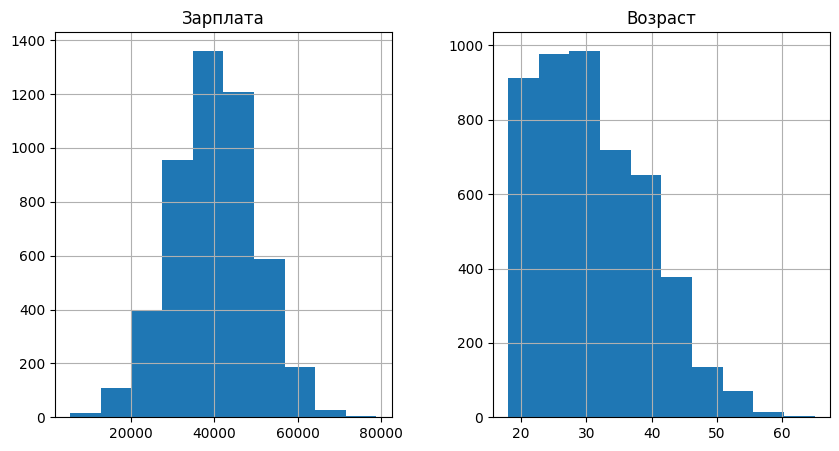

In [8]:
make_hist(df, [['Зарплата', 'Возраст']])

In [9]:
# Функция для построения каунтплотов

def make_countplot(dataframe, lst:list):
    for value in lst:
        sns.countplot(data=dataframe, x=value)
        plt.show()

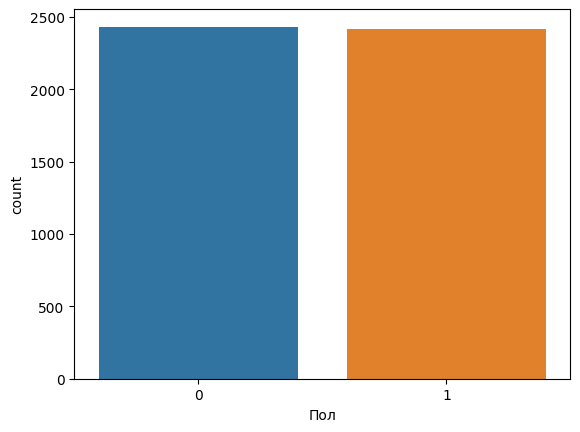

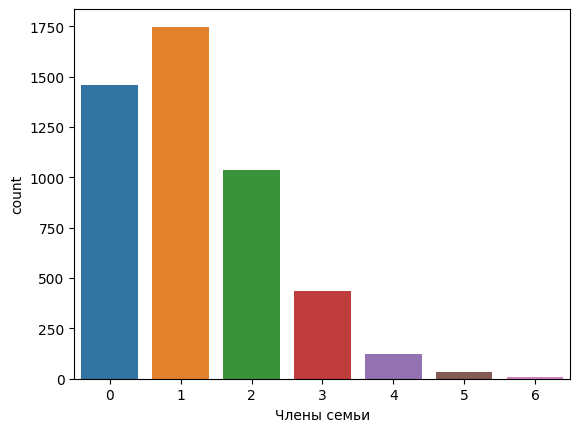

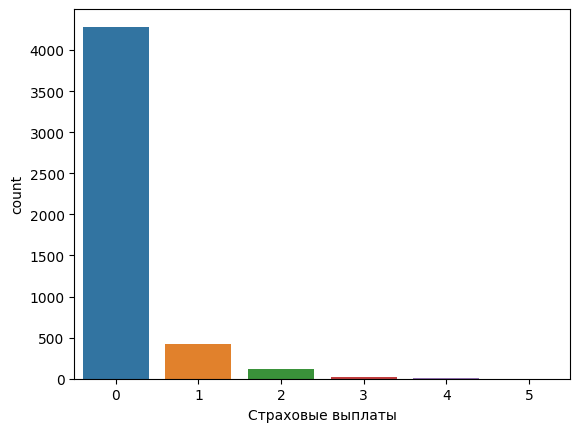

In [10]:
make_countplot(df, ['Пол', 'Члены семьи', 'Страховые выплаты'])

Среди клиентов банка равное количество женщин и мужчин.  

Переменная "Зарплата" имеет близкое к нормальному распределение.

В признаке "Члены семьи" преобладают значения 0 и 1, то есть больше всего клиентов не имеют детей. 

В переменной "Страховые выплаты" (целевой признак) больше всего значений приходится на 0, то есть у большинства клиентов страховых выплат не было (имеется дисбаланс признака).


### Вывод по разделу
Мы провели обзор данных, посмотрели на распределения и удалили дубликаты (чтобы они не влияли на качество модели). В целевом признаке имеется значительный дисбаланс.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
ŷ = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Умножение на обратимую матрицу не меняет качества модели линейной регрессии.**

**Обоснование:** 
Домножим нашу матрицу X на обратимую матрицу R. Подставим значения в формулу обучения:

$$
X_1 = X R
$$

$$
w_1 = ((X R)^T X R)^{-1} (X R)^T y
$$

Раскроем скобки. Поскольку транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке, у нас получится следующее:

$$
w_1 = ((R^T X^T X R)^{-1} R^T X^T y
$$

Раскроем большие скобки и перегруппируем множители:

$$
w_1 = R^{-1} (X^T X)^{-1} (R^T)^{-1} R^T X^T y
$$

Поскольку матрица R по условию задачи является обратимой, при умножении на обратную себе она дает единичную матрицу. Сделаем преобразование:

$$
w_1 = R^{-1} (X^T X)^{-1} E X^T y
$$

Поскольку при умножении матрицы на единичную матрицу получается исходная матрица, E из формулы можно убрать:

$$
w_1 = R^{-1} (X^T X)^{-1} X^T y
$$

$(X^T X)^{-1} X^T y$ — это формула коэффициента w. Подставим его в нашу формулу:

$$
w_1 = R^{-1} w
$$

Теперь возьмем формулу линейной регрессии и подставим туда полученное значение:

$$
ŷ = X w
$$

$$
ŷ_1 = X_1 w_1
$$

$$
ŷ_1 = X_1 R^{-1} w
$$

$X_1$ — это матрица $X$, домноженная на обратимую матрицу $R$. Подставим значение в формулу:

$$
ŷ_1 = X_1 R R^{-1} w
$$

$R R^{-1}$ превращаются в единичную матрицу. В результате получаем:

$$
ŷ_1 = X_1 w
$$



### Вывод по разделу
Мы доказали, что умножение матрицы признаков на случайную обратимую матрицу не меняет качество предсказания модели линейной регрессии.

## Алгоритм преобразования

**Алгоритм**

1. Для шифрования данных создадим случайную матрицу и проверим ее на обратимость, после чего умножим матрицу признаков на эту обратимую матрицу. 
2. Обучим модель линейной регрессии на исходных данных. Проверим качество модели метрикой R2.
3. Переобучим модель на преобразованных данных и сравним метрики.

**Обоснование**

Ранее мы показали, что при умножении матрицы признаков на случайную обратимую матрицу качество модели линейной регрессии не изменится.

## Проверка алгоритма

In [11]:
# Выделим целевой признак и разобьем данные на обучающую и тестовую выборки
X = df.drop('Страховые выплаты', axis=1)
y = df['Страховые выплаты']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# Создаем случайную квадратную матрицу
matr = np.random.normal(size=(4,4))

In [13]:
# Проверяем на обратимость
np.linalg.inv(matr)

array([[ 1.40843356e-01,  5.51429623e-01,  2.27898027e-03,
        -8.76979350e-01],
       [-6.55289743e-01,  1.14706359e+00,  9.95842759e-02,
        -1.66949618e+00],
       [ 9.87179471e-01, -1.31789156e+00,  7.00242524e-01,
         2.59798196e+00],
       [ 4.29343056e-02,  2.86604329e-01, -3.53702984e-01,
        -1.08835543e-01]])

In [14]:
# Преобразуем признаки умножением обратимую матрицу
X_train_1, X_test_1 = X_train @ matr, X_test @ matr

In [15]:
# Обучаем модель линейной регрессии на исходных данных
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_1 = r2_score(y_test, pred)
print(f'R2 модели на исходных данных: {r2_1}')

R2 модели на исходных данных: 0.42035890875446624


In [16]:
# Обучаем модель на преобразованных данных
model.fit(X_train_1, y_train)
pred = model.predict(X_test_1)
r2_2 = r2_score(y_test, pred)
print(f'R2 модели на исходных данных: {r2_2}')

R2 модели на исходных данных: 0.42035890875449633


In [17]:
# Считаем разницу метрик
diff = r2_1 - r2_2
diff

-3.008704396734174e-14

### Вывод по разделу

Значения метрики R2, полученные на моделях из исходных и преобразованных данных, практически не различаются. Следовательно, мы можем сделать вывод о том, что в результате преобразования данных качество модели не изменилось. Это и было нашей задачей.

## Вывод по проекту

В ходе проекта была выполнена задача преобразования данных, чтобы скрыть персональную информацию о клиентах. 

Использование алгоритма преобразования (умножение матрицы признаков на случайную обратимую матрицу) было обосновано математически, после чего мы провели соответствующее преобразование с нашими данными.

Измерение метрики R2 для моделей линейной регрессии, построенных на исходных и преобразованных данных, показало, что качество модели после преобразования данных не меняется.
